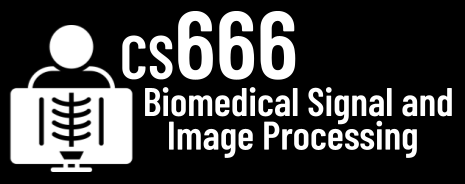
#Assignment 5

In [ ]:
# NAME:Nandani Mavani

In [ ]:
# In this assignment, we will visualize and explore a CT scan!

In [1]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.5 MB/s eta 0:00:00


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [ ]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [ ]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [ ]:
# TODO: YOUR_ANSWER

There are 220 slides.

In [ ]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

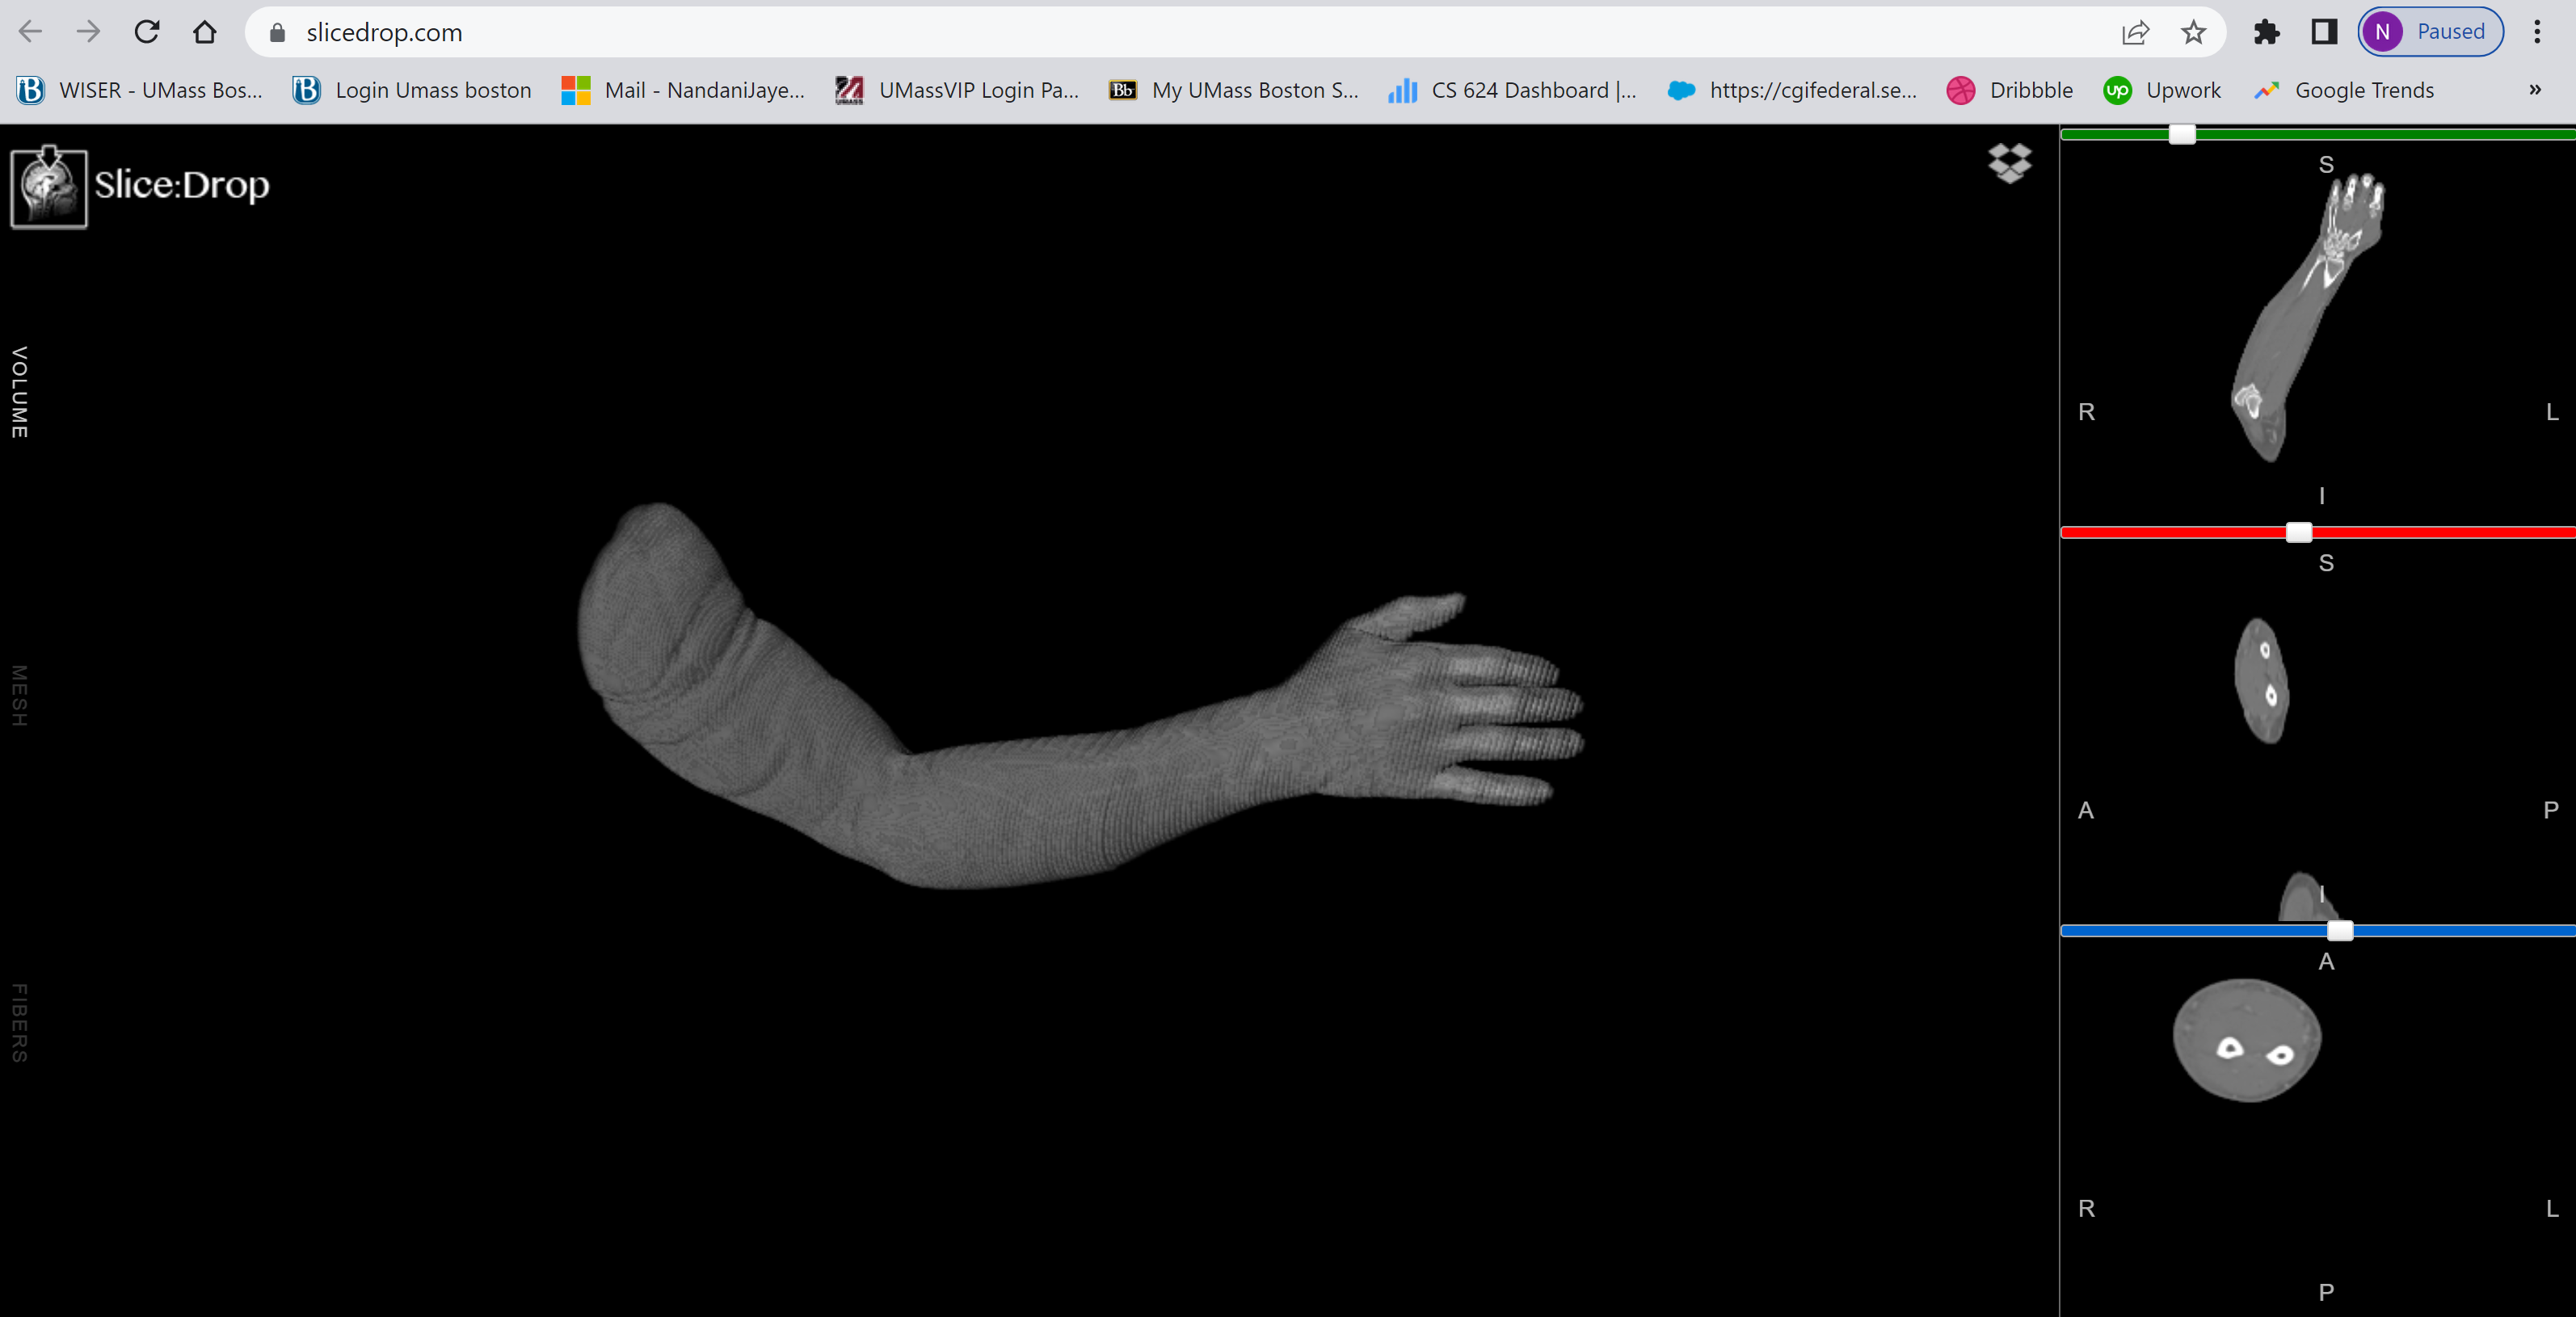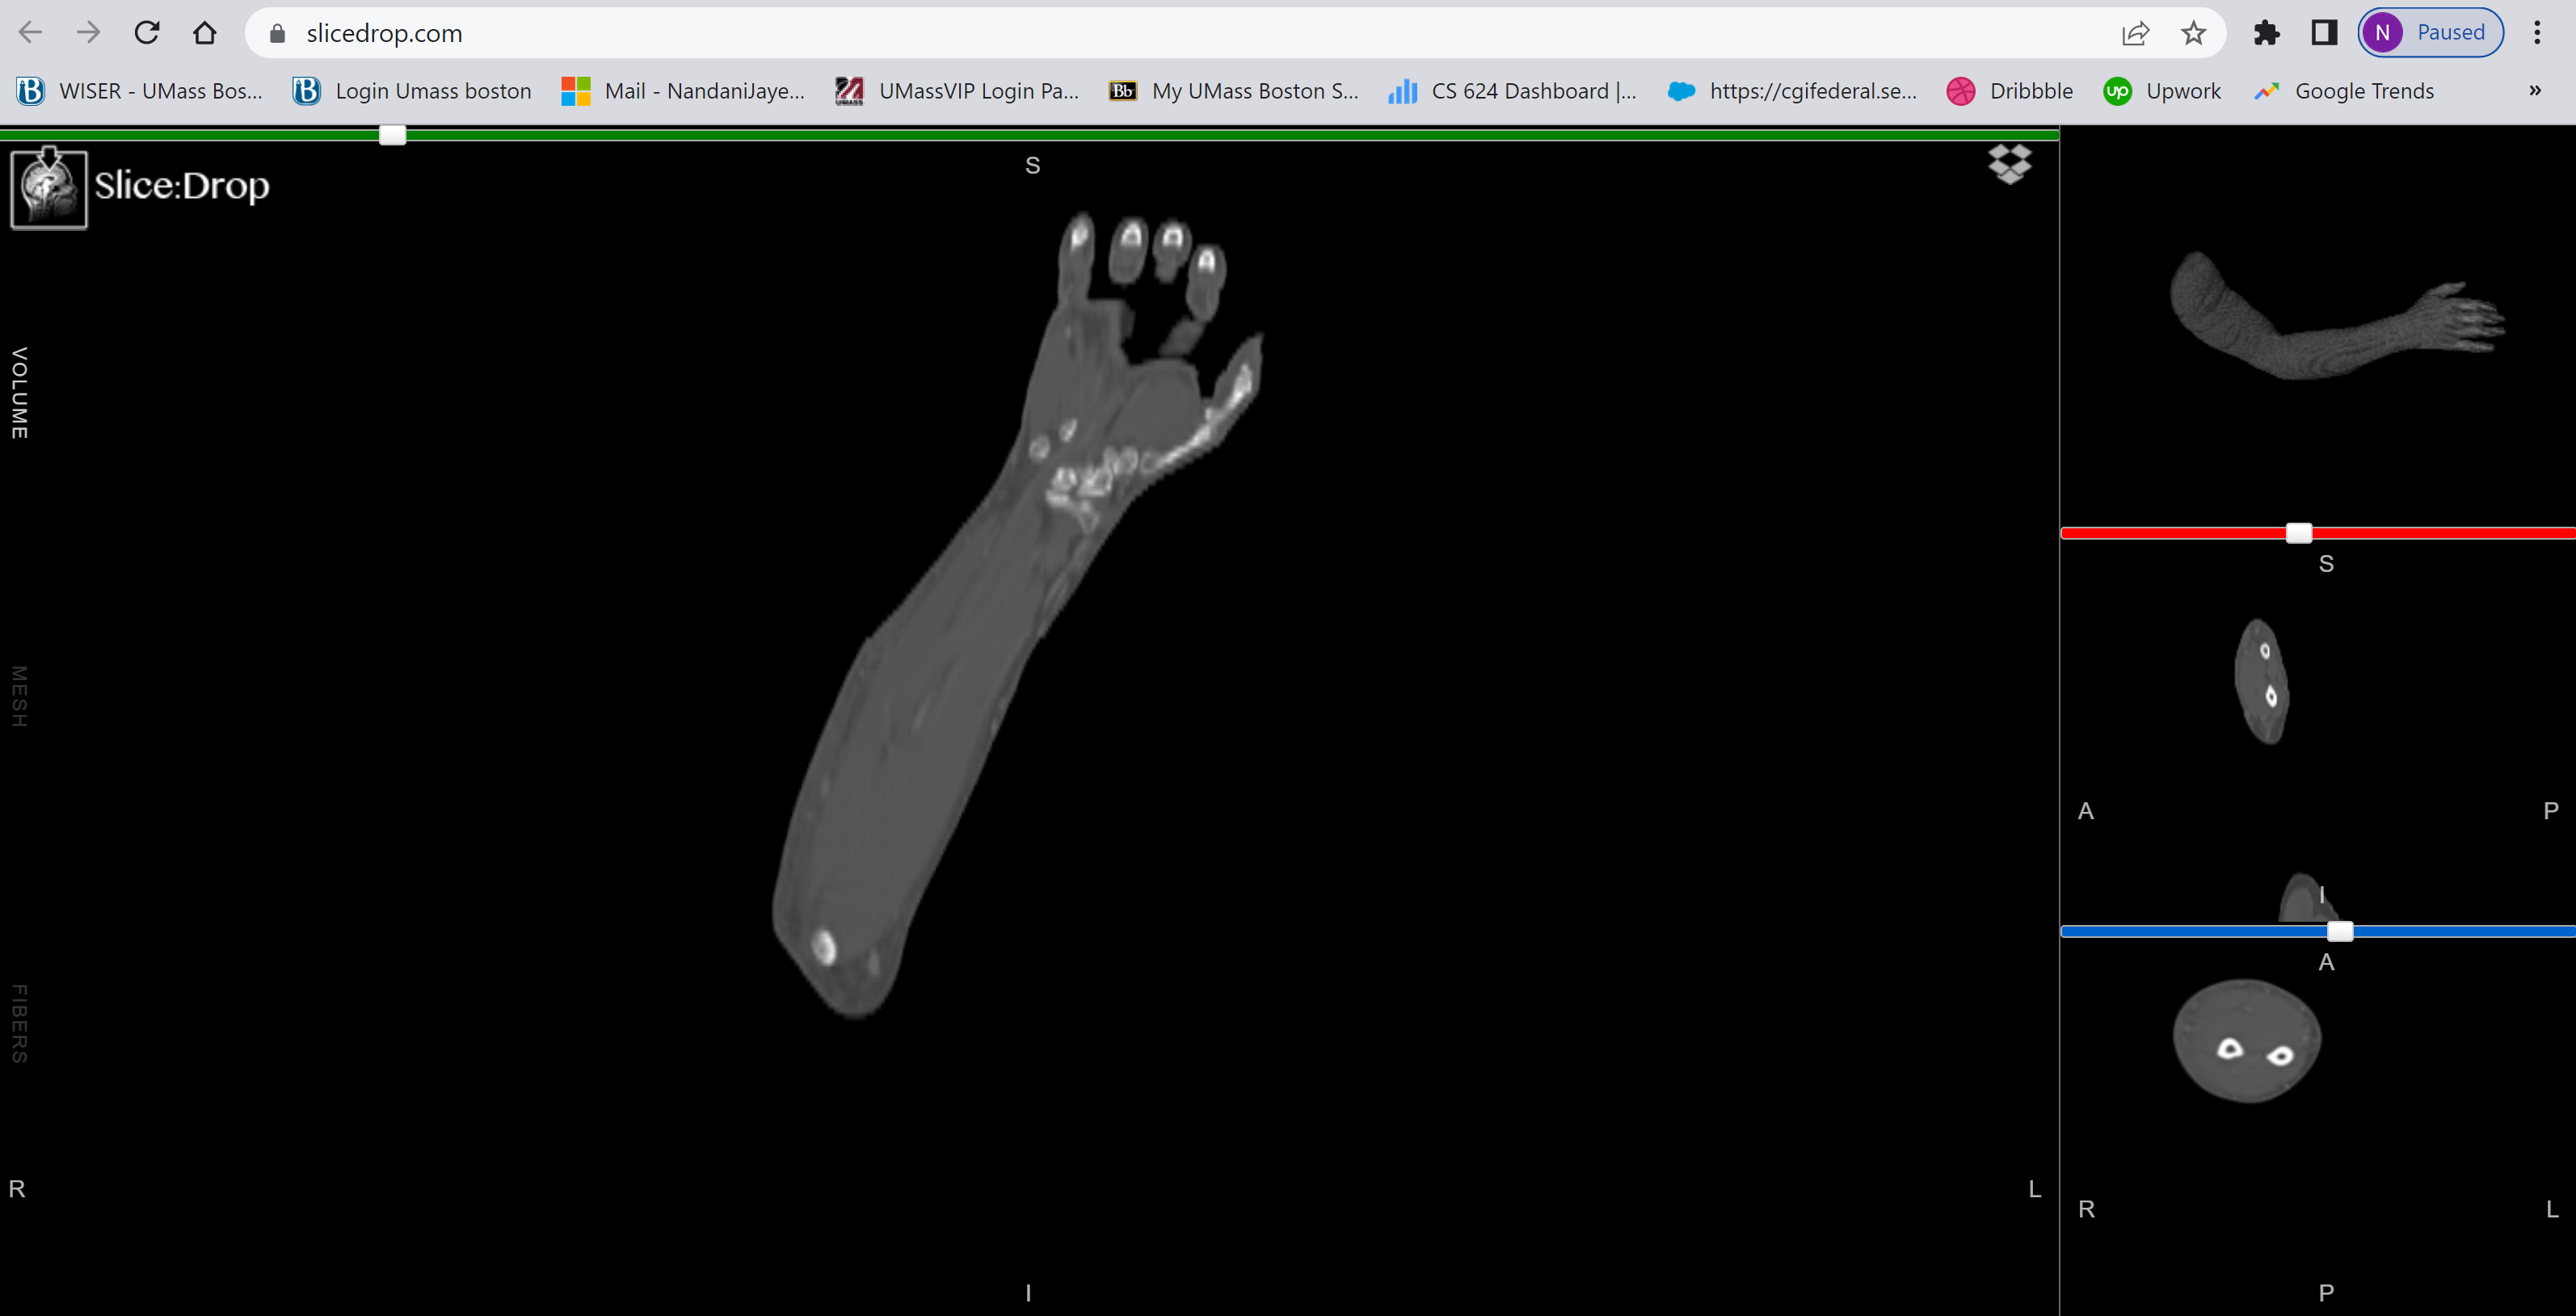

In [ ]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [ ]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

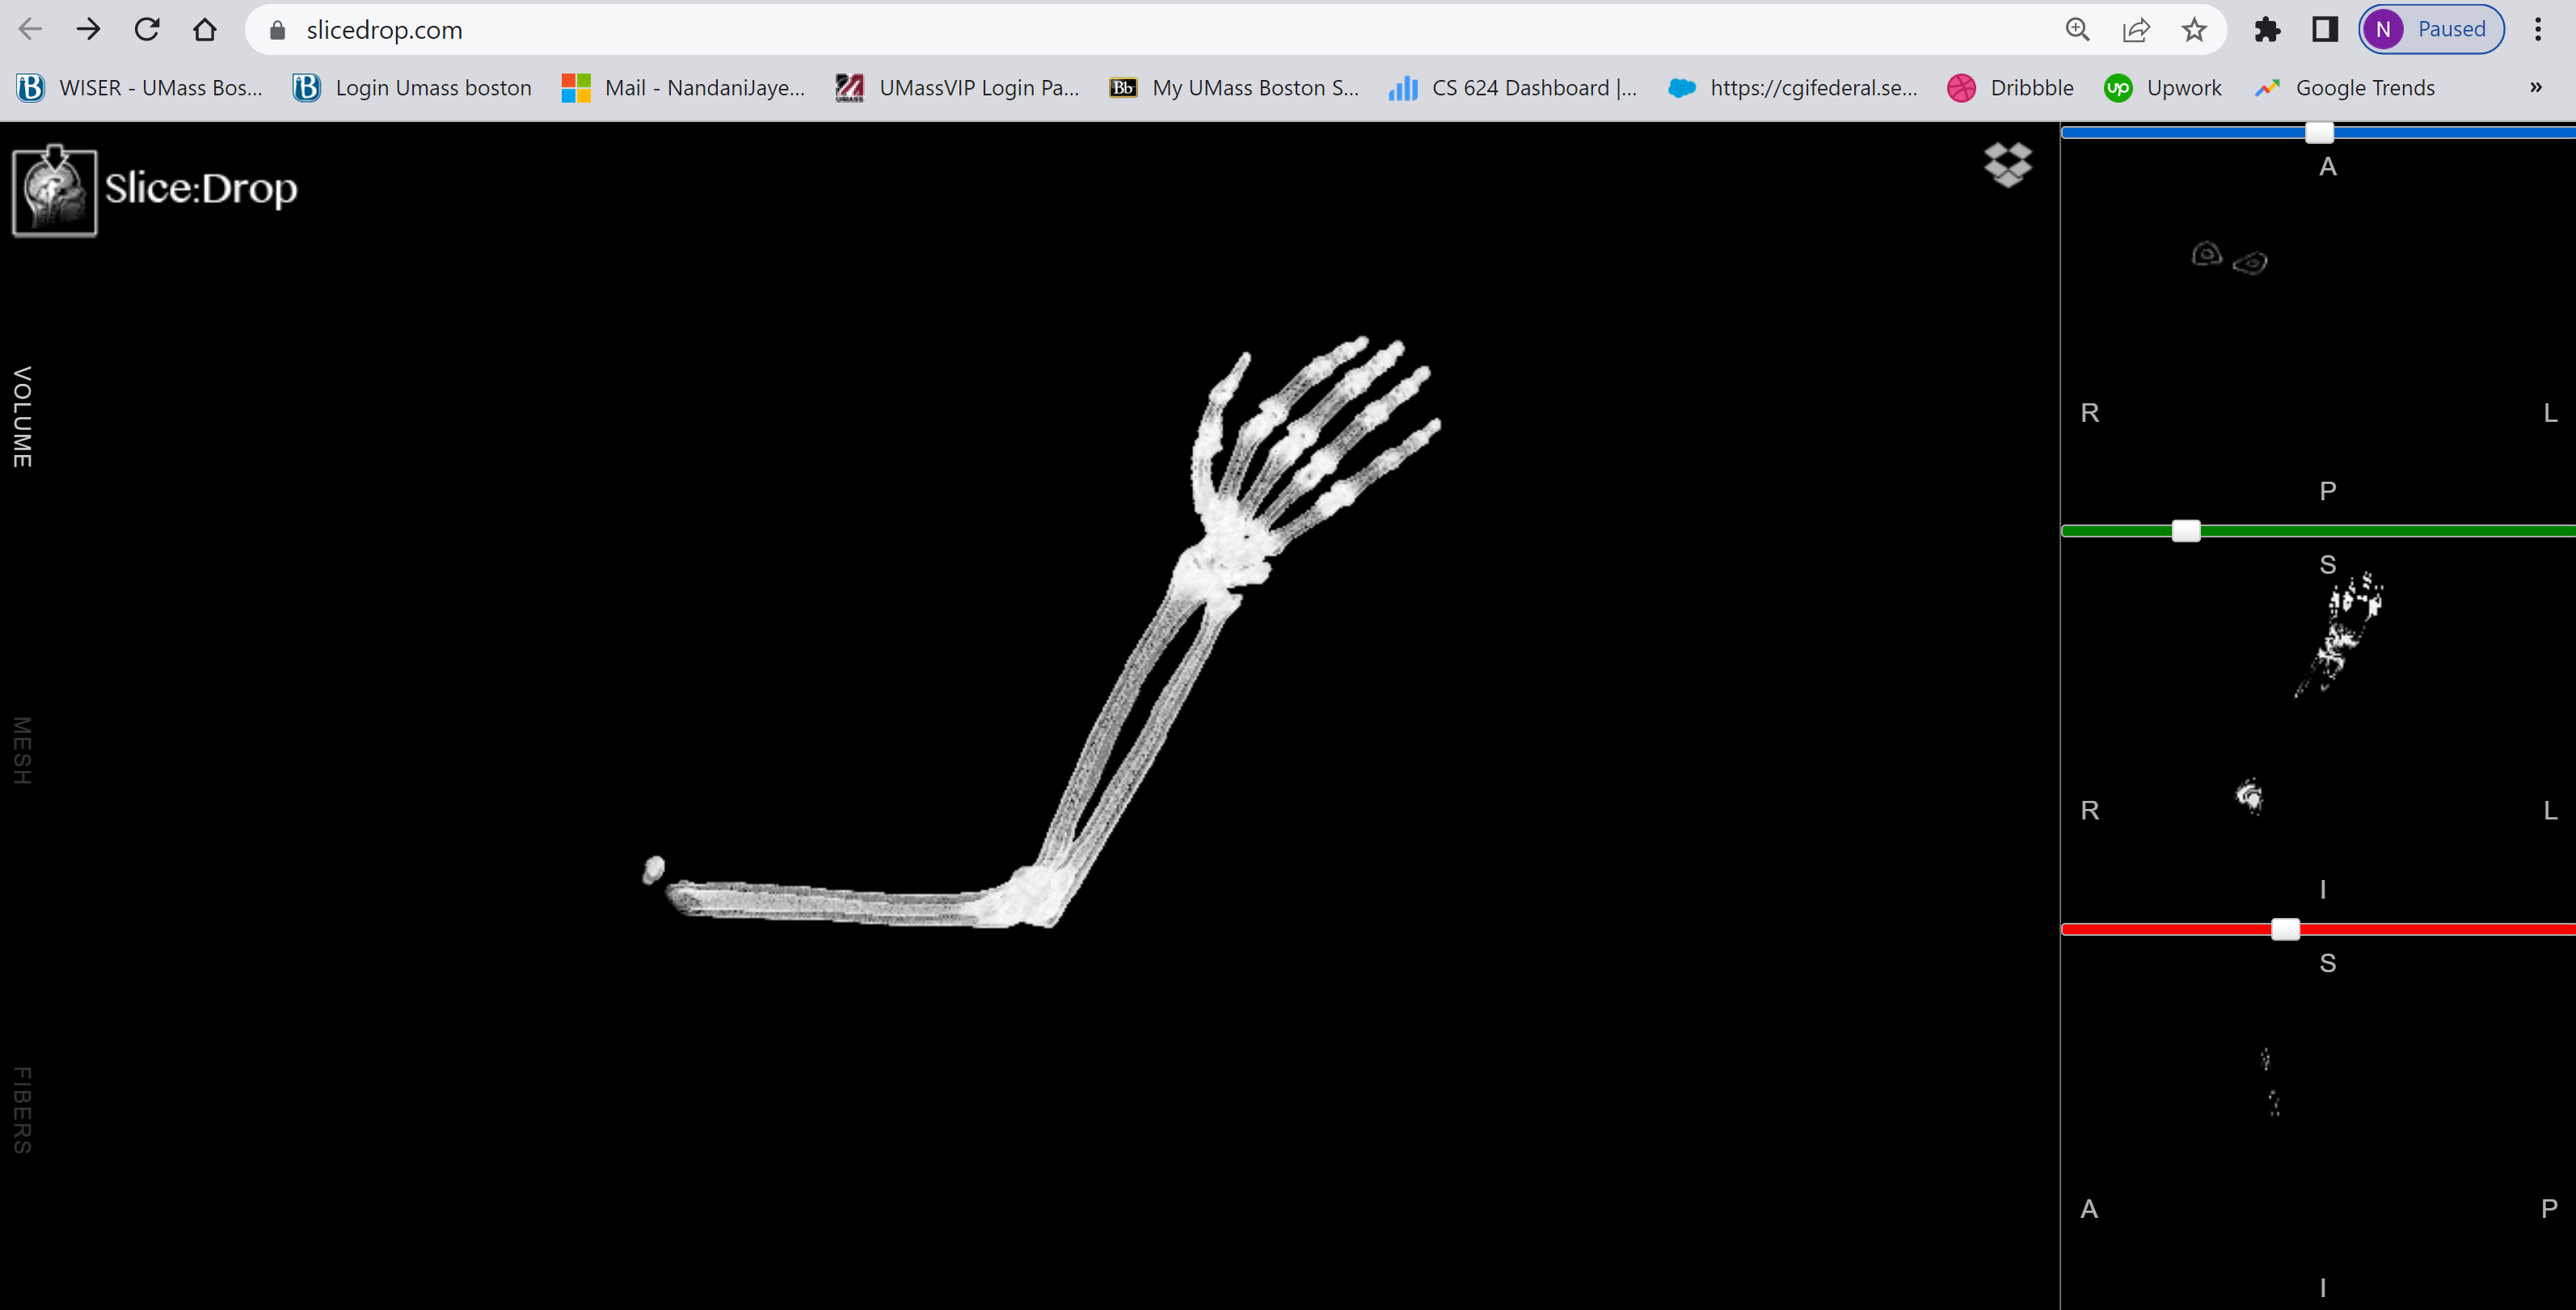

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [ ]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [3]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [7]:
from pydicom import dcmread
import os
import pydicom

In [8]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY
ct_f = os.listdir('ct')
slices = []
ct_files = list(ct_f)

for ct_file in ct_files:
    data = pydicom.dcmread(os.path.join("./ct/", ct_file))
    if hasattr(data, 'SliceLocation'):
       slices.append(data)

slices = sorted(slices, key=lambda s: s.SliceLocation)
imageShape = list(slices[0].pixel_array.shape)
imageShape.append(len(slices))
volume3d = np.zeros(imageShape, dtype=float)

for i, s in enumerate(slices):
    image2D = s.pixel_array
    volume3d[:, :, i] = image2D

In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

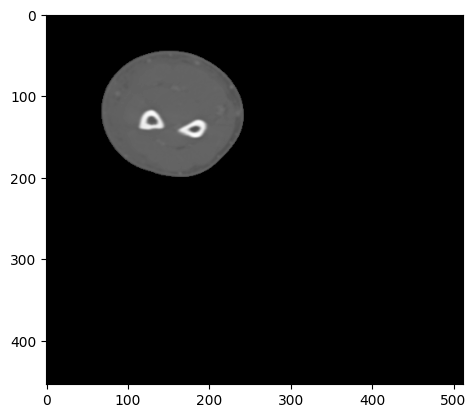

In [9]:
# TODO: YOUR CODE FOR AXIAL
axial = plt.plot()
plt.imshow(volume3d[:, :, imageShape[2]//2], cmap='gray')

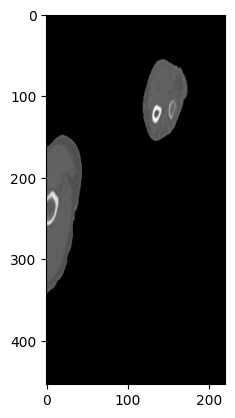

In [11]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal = plt.plot()
plt.imshow(volume3d[:, imageShape[1]//2, :], cmap='gray')

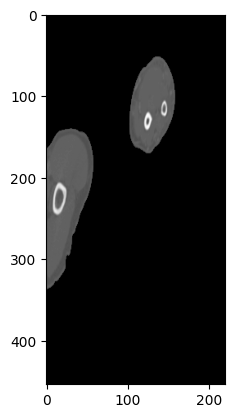

In [12]:
# TODO: YOUR CODE FOR CORONAL
coronal = plt.plot()
plt.imshow(volume3d[:, imageShape[0]//2, :], cmap='gray')

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

-175.0
235.0


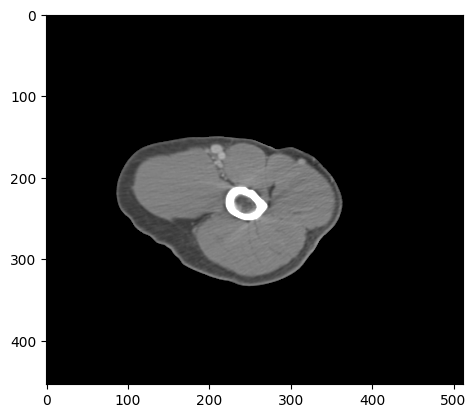

In [13]:
# TODO: YOUR CODE
slice_10 = slices[10]

window_width = slice_10.WindowWidth
window_center = slice_10.WindowCenter

pixels = slice_10.RescaleSlope * volume3d[:,:,10]
rescale = slice_10.RescaleIntercept

min = window_center - window_width/2

max = window_center + window_width/2

print(min)
print(max)
plt.imshow(pixels + rescale,cmap='gray', vmin=(min - 100), vmax=(max+150))
plt.show()

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

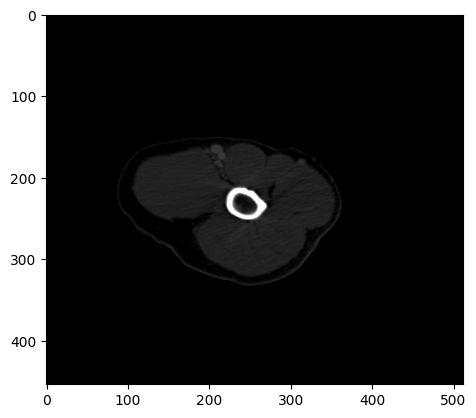

In [15]:
# TODO: YOUR CODE
level = 500
window = 1200
vmin = level - window/2
vmax = level + window/2
plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

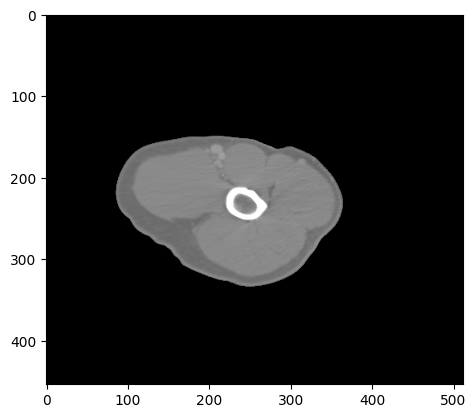

In [20]:
# TODO: YOUR CODE
level = 0
window = 1500
vmin = level - window/2
vmax = level + window/2
plt.imshow(pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [ ]:
# Which values make sense and why?

Low value = -175 and high value = 235

window value between -175 to 235 display the clear image

There is a clear difference between air, tissues and bone.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

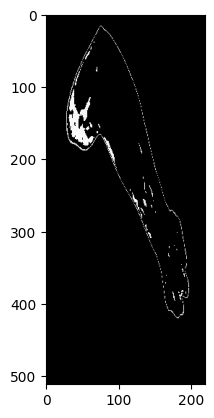

In [21]:
# TODO: YOUR CODE TO SEGMENT FAT
new_m = volume3d[120].copy().astype(np.int16)
new_m[new_m < -100] = 0
new_m[new_m > 950] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

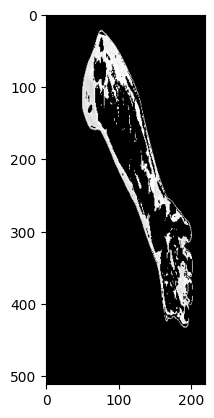

In [22]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
new_m = volume3d[100].copy().astype(np.int16)
new_m[new_m > 1070] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

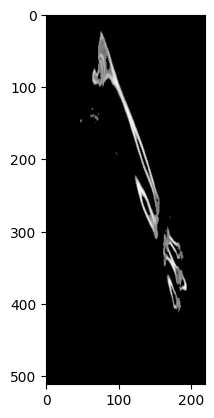

In [23]:
# TODO: YOUR CODE TO SEGMENT BONES
new_m = volume3d[120].copy().astype(np.int16)
new_m[new_m < 1200] = 0
plt.imshow(new_m, cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: NO

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""